In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

from sklearn import datasets
from sklearn.cluster import KMeans

import seaborn as sns

# Analyse des données

## Import des données

In [2]:
data = pd.read_csv('Data/processed_data/data.csv')
pays = data['pays']
#data.set_index('pays')
data = data.drop(['Unnamed: 0'], axis = 1)
data

,pays,dispo_calories,dispo_proteines,pop_croissance,pib,politique,importation
0,Afghanistan,5.90,0.60,1.382500,1970.6,-2.73,35616.91
1,Afrique du Sud,138.50,13.57,1.135503,12665.8,-0.24,398923.26
2,Albanie,64.98,4.59,0.984022,13253.7,0.08,23503.19
3,Algérie,20.44,1.75,1.211826,10735.4,-0.86,0.49
4,Allemagne,39.69,4.74,1.024641,51423.2,0.67,470860.36
...,...,...,...,...,...,...,...
164,Égypte,46.07,4.72,1.231658,11951.4,-1.21,19675.01
165,Émirats arabes unis,103.12,10.40,1.094970,63299.4,0.63,474939.04
166,États-Unis d'Amérique,205.19,17.71,1.079565,59755.2,-0.02,66140.69
167,Éthiopie,1.98,0.20,1.313243,2296.9,-1.74,451.20


## Normalisation des données

*On normalise les données afin d'avoir une analyse la plus fidèle possible, en étant sur la même échelle !*

In [3]:
#Transformation en array Numpy
#Indexation selon les pays par la fonction .set_index()
data.set_index('pays', inplace=True)

X = data.values
X.shape

(169, 6)

In [4]:
from sklearn import preprocessing

# Centrage / réduction des données pour que nos données soit à la même échelle !

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [5]:
# Nouveau DataFrame avec les données centré, réduite et le nom de chaque variables !

df_std = pd.DataFrame(X_scaled, columns=data.columns)
df_std

,dispo_calories,dispo_proteines,pop_croissance,pib,politique,importation
0,-1.111768,-1.196081,1.614546,-0.892507,-2.949617,-0.202899
1,1.112672,1.285322,-0.123926,-0.344630,-0.202078,2.733277
2,-0.120668,-0.432720,-1.190112,-0.314514,0.151020,-0.300800
3,-0.867852,-0.976065,0.413271,-0.443518,-0.886204,-0.490745
4,-0.544922,-0.404022,-0.904222,1.640771,0.802043,3.314660
...,...,...,...,...,...,...
164,-0.437894,-0.407848,0.552854,-0.381227,-1.272404,-0.331739
165,0.519152,0.678842,-0.409210,2.249146,0.757906,3.347623
166,2.231434,2.077381,-0.517643,2.067589,0.040677,0.043789
167,-1.177529,-1.272609,1.127084,-0.875792,-1.857222,-0.487102


*Les données sont bien centré autour de 0 !*

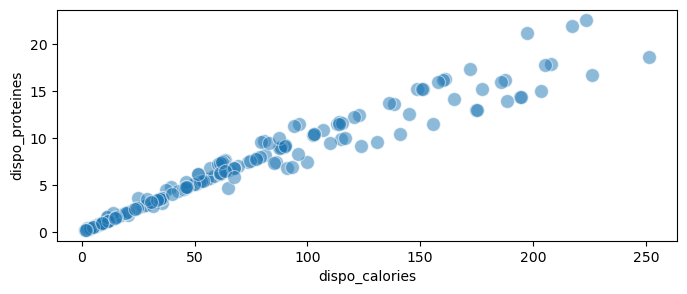

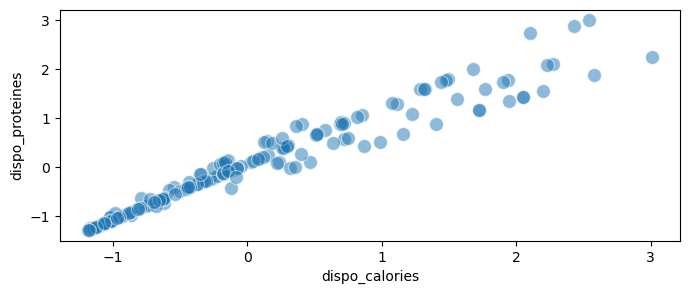

In [6]:
# Exemple avec la disponibilité de calories et de proteines !

plt.figure(figsize=(8, 3))
sns.scatterplot(data=data, x='dispo_calories', y='dispo_proteines', s=100, alpha=.5)

plt.show()

plt.figure(figsize=(8, 3))
sns.scatterplot(data=df_std, x='dispo_calories', y='dispo_proteines', s=100, alpha=.5)

plt.show()

*On voit bien ici le changement d'échelle !*

## Classification ascendante hiérarchique avec un dendrogramme

In [7]:
# Clustering hiérarchique: création d'une Matrice des liens selon la Méthode de Ward

Z = linkage(X_scaled, method = 'ward', metric='euclidean')

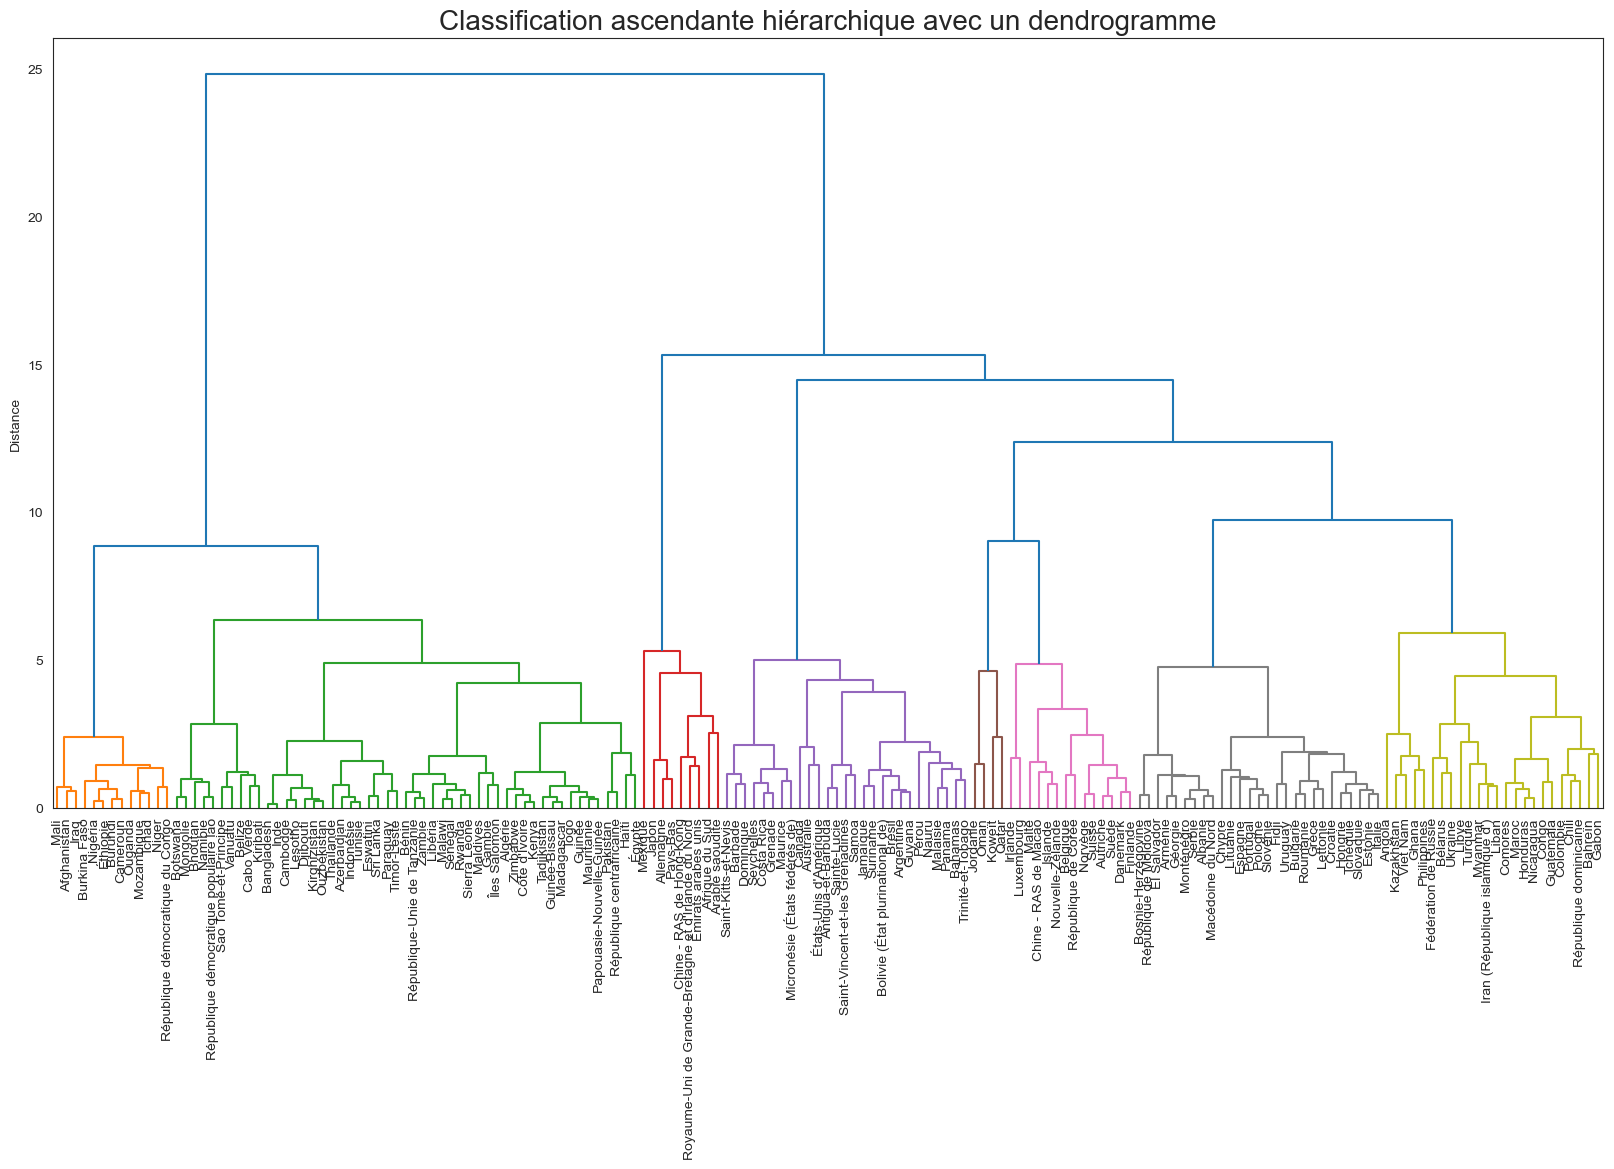

In [8]:
# Affichage d'un premier dendrogramme global !

fig =plt.figure(figsize=(20,10))
sns.set_style('white')
plt.title('Classification ascendante hiérarchique avec un dendrogramme', fontsize=20)
plt.ylabel('Distance', fontsize=10)

dendrogram(Z, labels = data.index, leaf_font_size=10, color_threshold=7, orientation='top')
plt.savefig("dendrogramme.png")
plt.show()

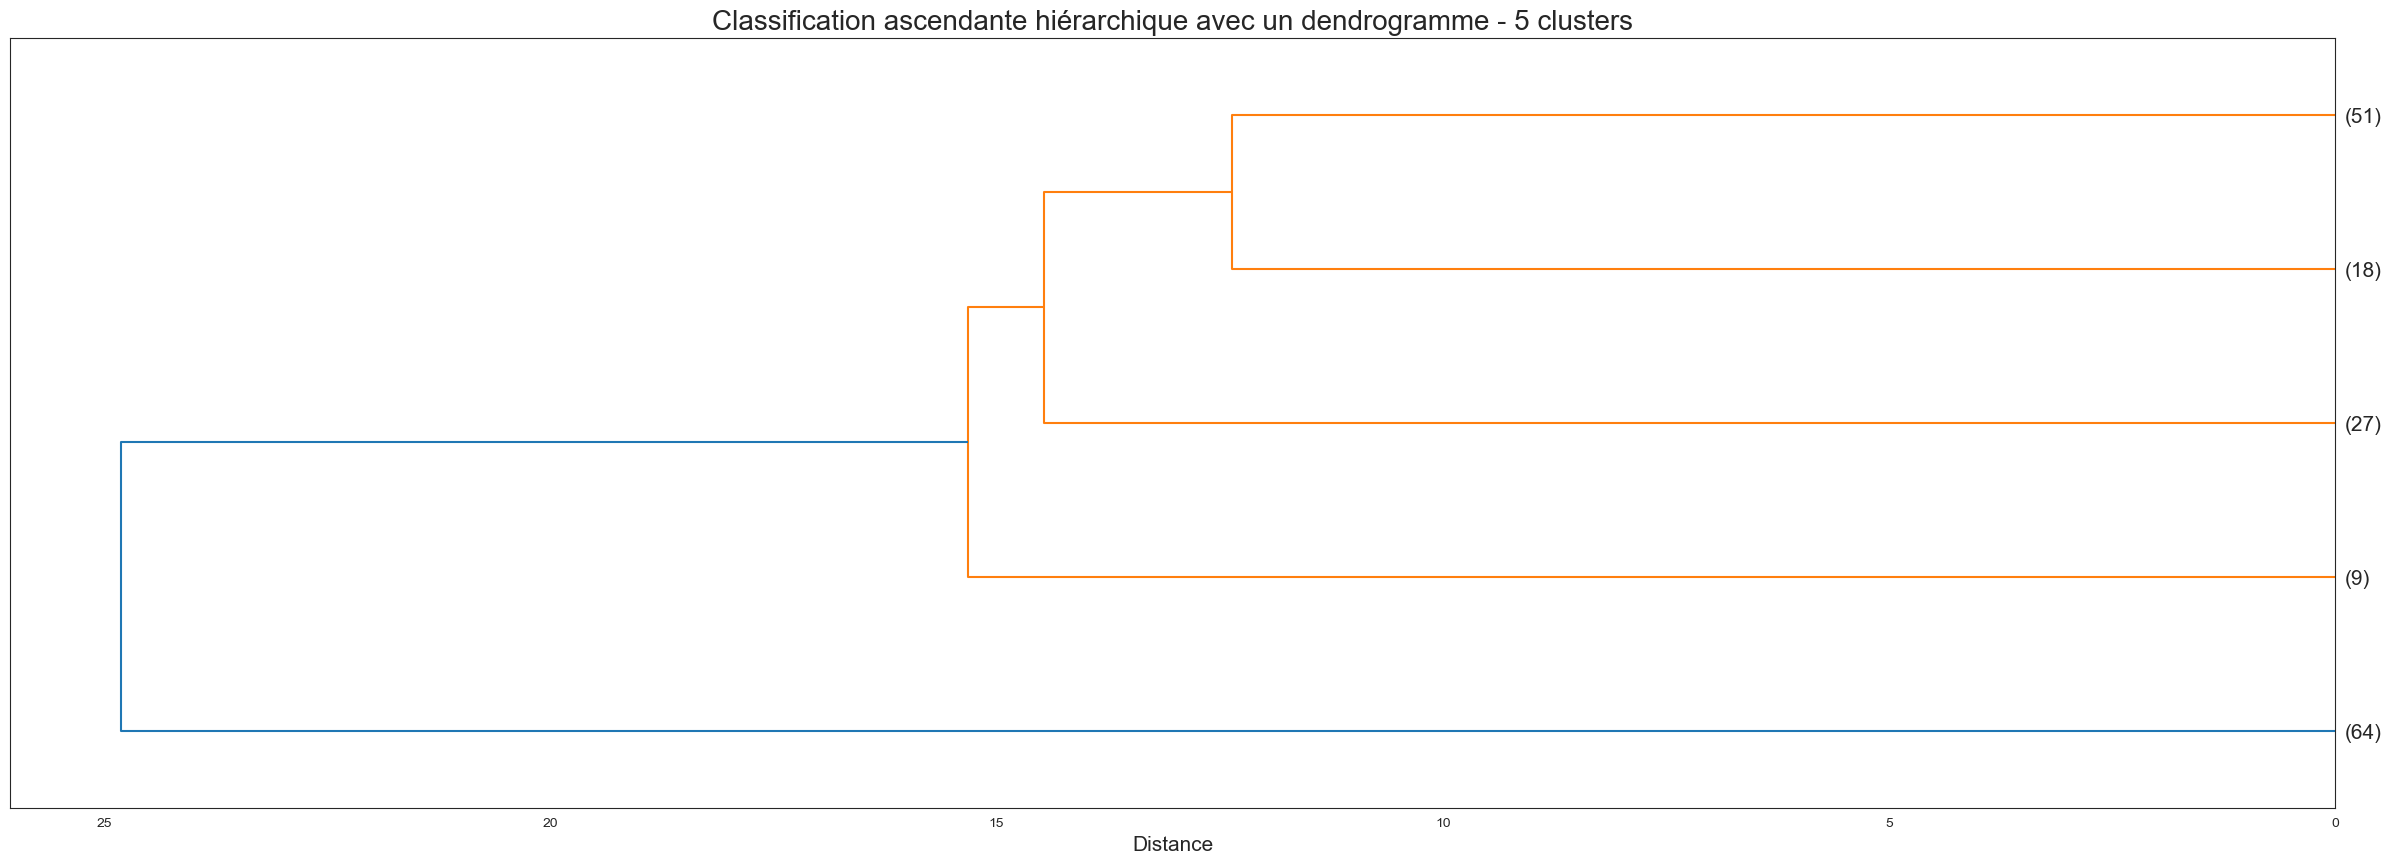

In [9]:
# Coupage du dendrogramme en 5 groupes pour avoir une première idée du partitionnement

fig = plt.figure(figsize=(30,10))
plt.title('Classification ascendante hiérarchique avec un dendrogramme - 5 clusters', fontsize=20)
plt.xlabel('Distance', fontsize=15)

dendrogram(Z, labels = data.index, p=5, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.savefig("dendrogramme_clusters5.png")
plt.show()

In [10]:
# Identification des 5 groupes obtenus
groupes_cah = fcluster(Z, 5, criterion='maxclust')
print('Numérotation de nos groupes : ' + str(np.unique(groupes_cah)))

# Index trié des groupes
idg = np.argsort(groupes_cah)

# Affichage des pays selon leurs groupes
df_pays_groupe = pd.DataFrame(data.index[idg], groupes_cah[idg]).reset_index()
df_pays_groupe = df_pays_groupe.rename(columns={'index':'Groupe'})

Numérotation de nos groupes : [1 2 3 4 5]


In [11]:
# Intégration des groupes dans nos données de départ représenté par le dataframe "data"
# Jointure interne nécessaire pour parvenir à agréger nos données

df_groupes_cah = pd.merge(data, df_pays_groupe, on='pays')

In [12]:
# Préparation de sous-ensembles permettant de caractériser les groupes un à un

df_groupe1_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 1]
df_groupe2_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 2]
df_groupe3_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 3]
df_groupe4_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 4]
df_groupe5_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 5]

In [13]:
df_groupe2_cah

,pays,dispo_calories,dispo_proteines,pop_croissance,pib,politique,importation,Groupe
1,Afrique du Sud,138.50,13.57,1.135503,12665.8,-0.24,398923.26,2
4,Allemagne,39.69,4.74,1.024641,51423.2,0.67,470860.36,2
7,Arabie saoudite,148.51,15.20,1.223895,44349.5,-0.66,617401.57,2
34,Chine - RAS de Hong-Kong,151.04,15.23,1.051668,55917.6,0.09,451454.48,2
74,Japon,61.67,6.22,0.977669,39935.5,1.04,535031.44,2
98,Mexique,130.79,9.57,1.119662,17878.3,-0.85,881419.27,2
118,Pays-Bas,29.14,3.48,1.049193,54324.4,0.85,363525.28,2
125,Royaume-Uni de Grande-Bretagne et d'Irlande du...,87.46,9.97,1.068506,42820.6,0.47,368593.39,2
165,Émirats arabes unis,103.12,10.40,1.094970,63299.4,0.63,474939.04,2


In [14]:
# Première comparaison des moyennes afin d'identifier le groupe de pays le plus porteur à ce niveau de l'analyse

df_groupes_cah.groupby('Groupe').mean()

,dispo_calories,dispo_proteines,pop_croissance,pib,politique,importation
Groupe,,,,,,
1,20.601094,2.040781,1.244993,5264.589063,-0.553281,12518.246719
2,98.880000,9.820000,1.082856,42512.700000,0.222222,506905.343333
3,175.718519,15.112222,1.089664,20331.088889,0.575556,20073.403333
4,75.927778,8.101667,1.217942,55257.661111,0.860556,55270.762778
5,76.034510,7.550980,1.060911,19889.388235,-0.141765,65920.304510


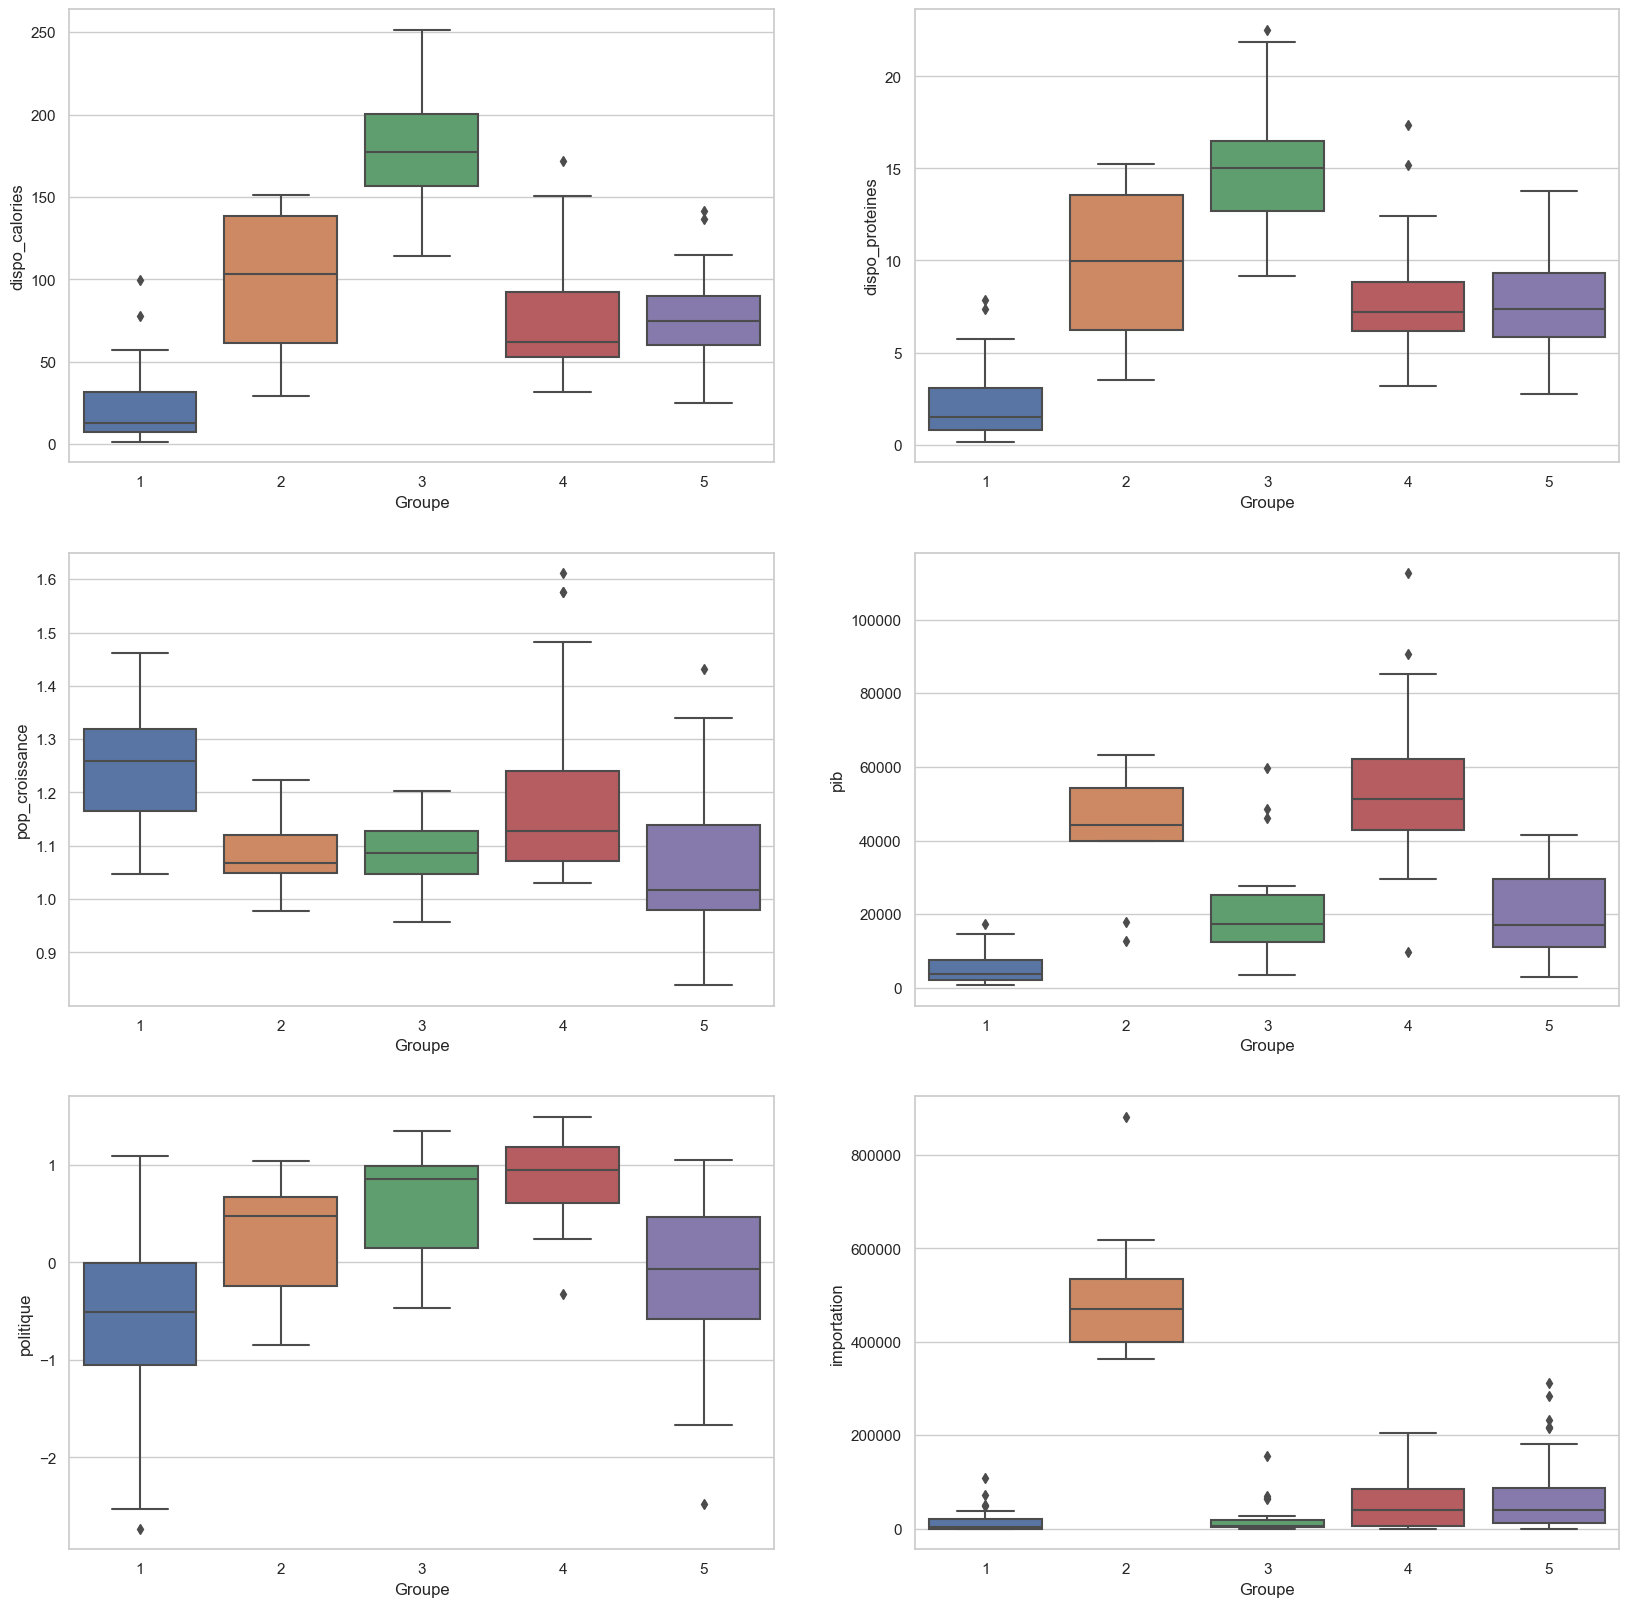

In [15]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(321)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='dispo_calories')

plt.subplot(322)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='dispo_proteines')

plt.subplot(323)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='pop_croissance')

plt.subplot(324)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='pib')

plt.subplot(325)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='politique')

plt.subplot(326)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='importation')

plt.savefig("boxplot_dendogramme.png")
plt.show(block=False)

**Analyse des boxplot**

- dispo_calories & dispo_proteines : *On observe 2 groupe qui on une consomation plus élever que les autres en terme de viande de poulet !*(Groupe 2 et 3)
- pop_croissance : *Ici encore 2 groupes dont la croissance de la population est plus élever que les autres !* (Groupe 1 et 4)
- pib : *On voit 2 groupes qui on un pib par habitant plus élever que les autres !* (Groupe 2 et 4)
- politique : *Il y a 3 groupe ayant une stabilité politique convenable !* (Groupe 2, 3 et 4)
- importation : *Le groupe 2 ce différentie de loin des autres groupes avec une quantité d'importation de viande poulet très élever !*

Nous allons nous interesser au groupe 2 qui reviens souvent et surtout sur les aspect qui nous interesse le plus : la consomation et l'importation !

In [16]:
# Affichage des pays qui compose le groupe 2

print(df_groupe2_cah['pays'].unique())

['Afrique du Sud' 'Allemagne' 'Arabie saoudite' 'Chine - RAS de Hong-Kong'
 'Japon' 'Mexique' 'Pays-Bas'
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"
 'Émirats arabes unis']


**On remarque qu'il y a seulement 9 pays dans ce groupe !**

### K-Means

In [17]:
# On utilise la méthode du coude !

# On défini d'abord une liste vide pour sotcker nos inertie

intertia = []

#On défini ensuite la liste du nombre de clusters que l'on veut tester

k_list = range(1, 10)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [18]:
# Pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie

for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df_std) 
  intertia.append(kmeans.inertia_)

C:\Users\Ibrahim\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
# Liste des inerties

intertia

[1014.0000000000001,
 663.726492937194,
 543.788833022015,
 433.13393778733115,
 367.39703511937233,
 329.8842537747988,
 298.3987417111322,
 267.40538326168917,
 251.2336057540282]

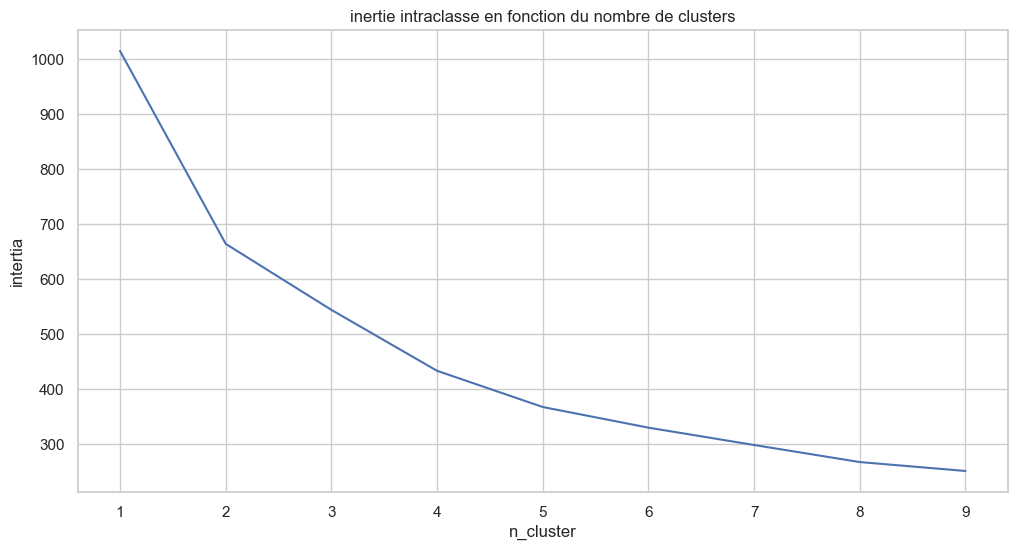

In [20]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_title("inertie intraclasse en fonction du nombre de clusters")
ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia)

On considère comme dernière cassure la plus "forte" au niveau du 5 ème cluster !

De plus cela correspond aux nombre de cluster choisit pour la classification ascendante hiérarchique à l'aide du dendrogramme, on va donc pouvoir comprarer les clusters !

In [21]:
# Nous devons d'abord ré-entrainer un estimateur !

kmeans = KMeans(n_clusters=5)
kmeans.fit(df_std)

KMeans(n_clusters=5)

In [22]:
# Voici les clusters :

kmeans.labels_

array([4, 0, 1, 4, 0, 4, 3, 0, 3, 1, 3, 2, 1, 3, 3, 4, 3, 2, 1, 1, 3, 1,
       4, 3, 2, 4, 4, 1, 4, 1, 4, 4, 3, 3, 0, 2, 2, 1, 1, 4, 3, 2, 4, 2,
       4, 3, 1, 2, 2, 1, 1, 2, 1, 3, 4, 4, 3, 2, 1, 4, 4, 3, 1, 4, 1, 2,
       4, 1, 1, 4, 2, 2, 2, 3, 0, 4, 1, 4, 4, 1, 3, 4, 2, 1, 1, 4, 2, 2,
       1, 4, 3, 4, 4, 4, 2, 1, 3, 4, 0, 3, 4, 1, 4, 1, 4, 3, 1, 4, 4, 2,
       2, 4, 4, 4, 4, 3, 4, 1, 0, 1, 2, 2, 3, 3, 2, 0, 4, 4, 2, 1, 1, 4,
       4, 4, 3, 3, 3, 3, 1, 1, 3, 4, 2, 2, 1, 2, 3, 2, 4, 4, 4, 2, 1, 4,
       4, 3, 1, 1, 1, 2, 4, 1, 4, 4, 4, 0, 3, 4, 4])

In [23]:
# Pour être plus clair, nous allons utiliser des lettres plutôt que des nombres

dd = {i:j for i,j in enumerate(list("abcde"))}
dd

{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e'}

In [24]:
labels = [dd[i] for i in kmeans.labels_]
labels[:10]

['e', 'a', 'b', 'e', 'a', 'e', 'd', 'a', 'd', 'b']

In [25]:
# Affichage des pays selon leurs cluster

df_pays_cluster = pd.DataFrame(data.index, labels).reset_index()
df_pays_cluster = df_pays_cluster.rename(columns={'index':'cluster'})
df_pays_cluster

,cluster,pays
0,e,Afghanistan
1,a,Afrique du Sud
2,b,Albanie
3,e,Algérie
4,a,Allemagne
...,...,...
164,e,Égypte
165,a,Émirats arabes unis
166,d,États-Unis d'Amérique
167,e,Éthiopie


In [26]:
# Intégration des groupes dans nos données de départ représenté par le dataframe "data"
# Jointure interne nécessaire pour parvenir à agréger nos données

df_cluster_km = pd.merge(data, df_pays_cluster, on='pays')
df_cluster_km

,pays,dispo_calories,dispo_proteines,pop_croissance,pib,politique,importation,cluster
0,Afghanistan,5.90,0.60,1.382500,1970.6,-2.73,35616.91,e
1,Afrique du Sud,138.50,13.57,1.135503,12665.8,-0.24,398923.26,a
2,Albanie,64.98,4.59,0.984022,13253.7,0.08,23503.19,b
3,Algérie,20.44,1.75,1.211826,10735.4,-0.86,0.49,e
4,Allemagne,39.69,4.74,1.024641,51423.2,0.67,470860.36,a
...,...,...,...,...,...,...,...,...
164,Égypte,46.07,4.72,1.231658,11951.4,-1.21,19675.01,e
165,Émirats arabes unis,103.12,10.40,1.094970,63299.4,0.63,474939.04,a
166,États-Unis d'Amérique,205.19,17.71,1.079565,59755.2,-0.02,66140.69,d
167,Éthiopie,1.98,0.20,1.313243,2296.9,-1.74,451.20,e


In [27]:
# Première comparaison des moyennes afin d'identifier le groupe de pays le plus porteur à ce niveau de l'analyse

df_cluster_km.groupby('cluster').mean()

,dispo_calories,dispo_proteines,pop_croissance,pib,politique,importation
cluster,,,,,,
a,98.880000,9.820000,1.082856,42512.700000,0.222222,506905.343333
b,67.604750,6.425000,1.080651,12236.190000,-0.368750,43894.016750
c,67.956452,7.409355,1.043999,44209.393548,0.815484,44619.021290
d,170.558125,14.880000,1.131424,23693.218750,0.495312,32692.577500
e,18.221579,1.872281,1.286566,4855.228070,-0.666491,26576.247895


In [28]:
# Le nombre de pays par cluster

df_cluster_km.groupby('cluster').count()

,pays,dispo_calories,dispo_proteines,pop_croissance,pib,politique,importation
cluster,,,,,,,
a,9,9,9,9,9,9,9
b,40,40,40,40,40,40,40
c,31,31,31,31,31,31,31
d,32,32,32,32,32,32,32
e,57,57,57,57,57,57,57


**On remarque un cluster où il y a 9 pays seulement !**

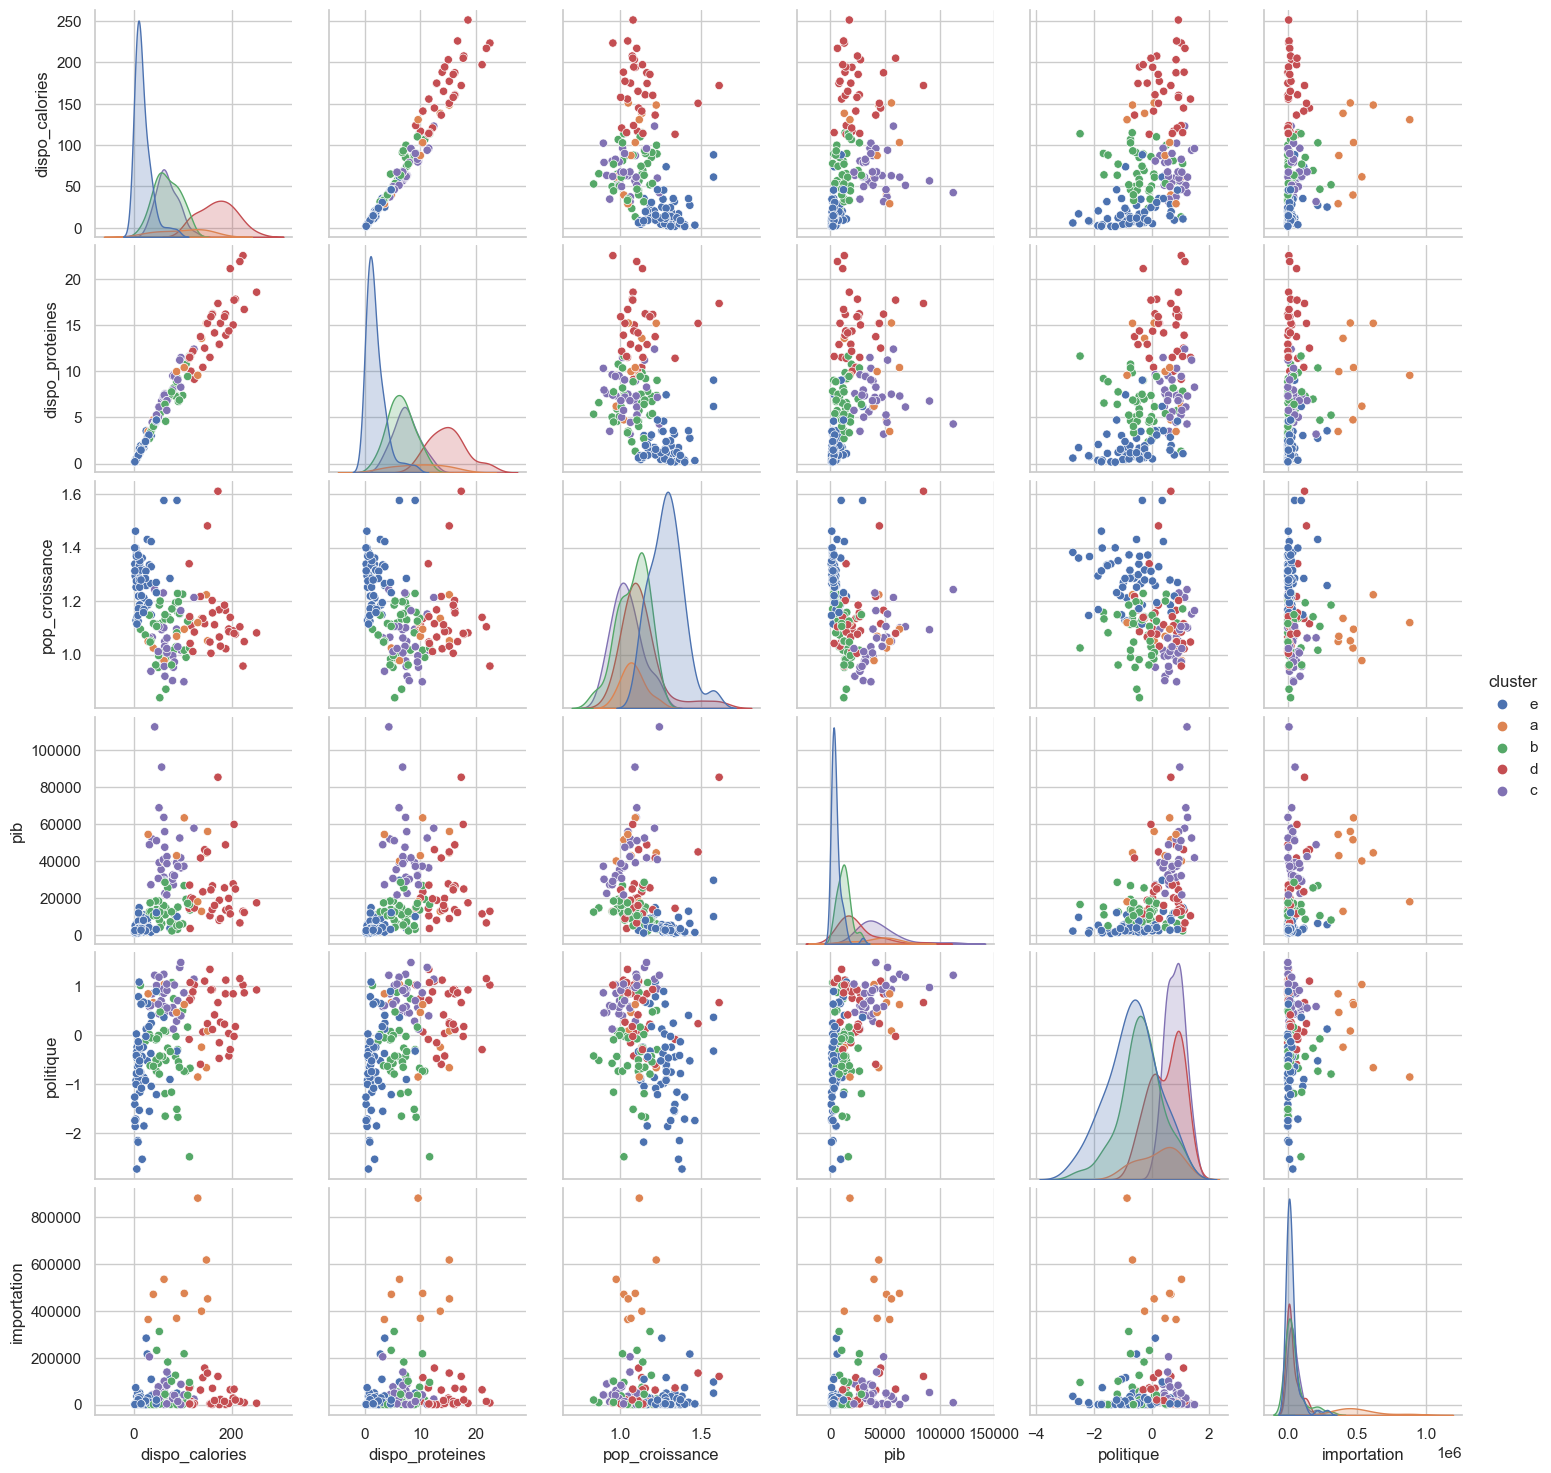

In [29]:
# Affichage graphique

sns.pairplot(df_cluster_km, hue="cluster")

**Ici aussi ce groupe de 9 pays ce distingue des autres au niveau de l'importation de viande de poulet !**

## ACP

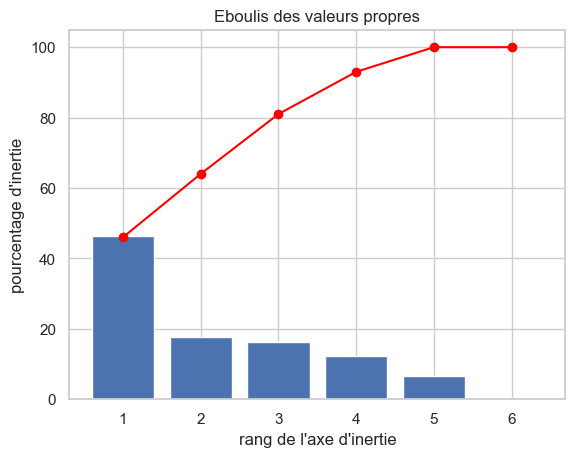

In [30]:
n_components = 6
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

#pca.explained_variance_ratio_

scree = (pca.explained_variance_ratio_*100).round(2)

scree_cum = scree.cumsum().round()

x_list = range(1, n_components+1)

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

**Les deux premières composantes principales représentent environ 65% d'inertie de nos données !**

Certes les 4 premières composantes principales représentent très bien nos données avec plus de 90% d'inertie, mais la 4D n'existe malheureusement pas ...

Nous allons dans un premier temps visualiser nos données sur les 2 premières composantes principales, afin d'avoir une première vue en 2 D. Puis par la suite nous visualiserons les 3 premières composantes principales, qui représente nos données avec plus de 80% d'inertie, en 3D !

In [31]:
pcs = pca.components_
pcs

array([[ 5.09657869e-01,  5.29585156e-01, -3.30138101e-01,
         3.90078673e-01,  4.12399128e-01,  1.69005446e-01],
       [-3.81894218e-01, -3.19843213e-01, -1.28167569e-02,
         4.95964341e-01,  1.15763407e-01,  7.01648817e-01],
       [ 3.34138095e-01,  3.10990698e-01,  4.23698493e-01,
        -1.97307598e-01, -5.14209802e-01,  5.55674453e-01],
       [ 3.26505792e-02,  5.19990920e-02,  8.28450884e-01,
         3.86580764e-01,  2.99448669e-01, -2.66054456e-01],
       [ 2.98302251e-04,  6.01240977e-02, -1.57914098e-01,
         6.39934283e-01, -6.80011528e-01, -3.15462480e-01],
       [-6.94039802e-01,  7.17081484e-01,  7.51148094e-03,
        -6.29852263e-02,  5.37479953e-03, -7.10276694e-03]])

In [32]:
pcs = pd.DataFrame(pcs)
test = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5
0,0.509658,0.529585,-0.330138,0.390079,0.412399,0.169005
1,-0.381894,-0.319843,-0.012817,0.495964,0.115763,0.701649
2,0.334138,0.310991,0.423698,-0.197308,-0.514210,0.555674
3,0.032651,0.051999,0.828451,0.386581,0.299449,-0.266054
4,0.000298,0.060124,-0.157914,0.639934,-0.680012,-0.315462
5,-0.694040,0.717081,0.007511,-0.062985,0.005375,-0.007103


In [33]:
features = data.columns
pcs.columns = features
pcs.index = [f"PC{i}" for i in x_list]
pcs.round(2)

,dispo_calories,dispo_proteines,pop_croissance,pib,politique,importation
PC1,0.51,0.53,-0.33,0.39,0.41,0.17
PC2,-0.38,-0.32,-0.01,0.50,0.12,0.70
PC3,0.33,0.31,0.42,-0.20,-0.51,0.56
PC4,0.03,0.05,0.83,0.39,0.30,-0.27
PC5,0.00,0.06,-0.16,0.64,-0.68,-0.32
PC6,-0.69,0.72,0.01,-0.06,0.01,-0.01


In [34]:
pcs.T

,PC1,PC2,PC3,PC4,PC5,PC6
dispo_calories,0.509658,-0.381894,0.334138,0.032651,0.000298,-0.694040
dispo_proteines,0.529585,-0.319843,0.310991,0.051999,0.060124,0.717081
pop_croissance,-0.330138,-0.012817,0.423698,0.828451,-0.157914,0.007511
pib,0.390079,0.495964,-0.197308,0.386581,0.639934,-0.062985
politique,0.412399,0.115763,-0.514210,0.299449,-0.680012,0.005375
importation,0.169005,0.701649,0.555674,-0.266054,-0.315462,-0.007103


In [35]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('PC{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('PC{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (PC{} et PC{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

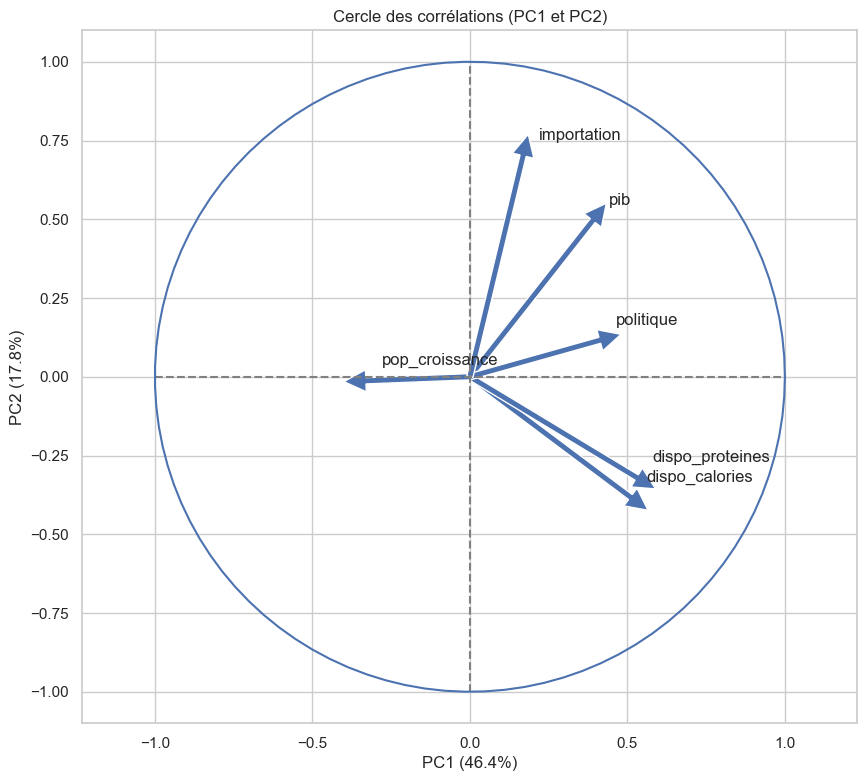

In [36]:
# Cercle de corrélation des 2 premières composantes

correlation_graph(pca, (0,1), features)

Les variables les mieux représenter sont : importation / pib / dispo_calories / dispo_proteines
Les variables les moins bien représenter sont : politique & pop_croissance

- dispo_calories & dispo_proteines sont corréler
- importation & pib sont légèrement corréler


- dispo_calories & dispo_proteines sont corréler à la 1ère composante principale
- importation est corréler à la 2ème composante principale

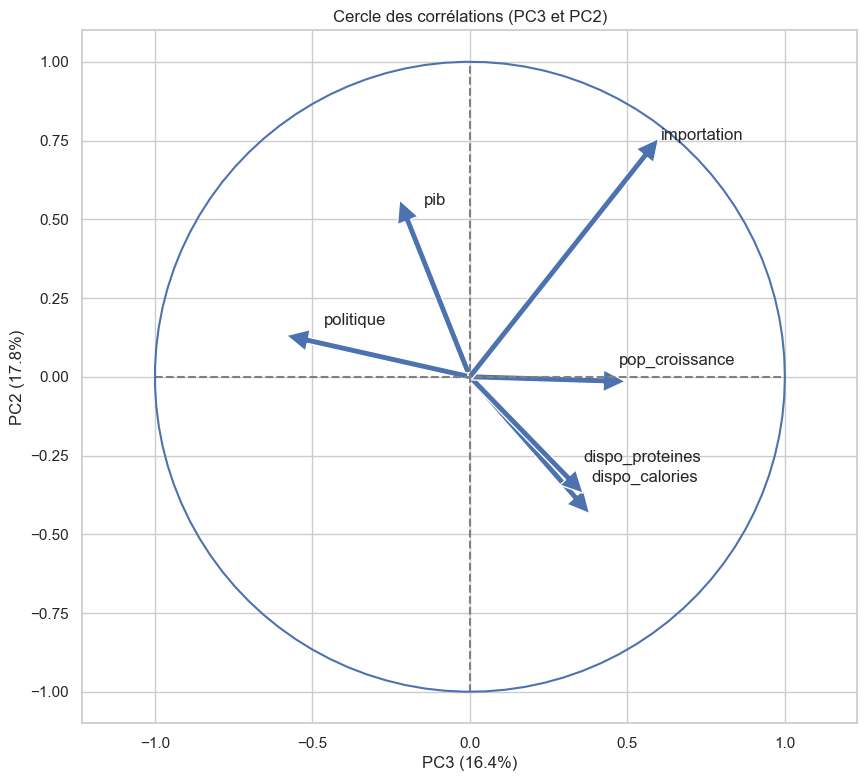

In [37]:
correlation_graph(pca, (2,1), features)

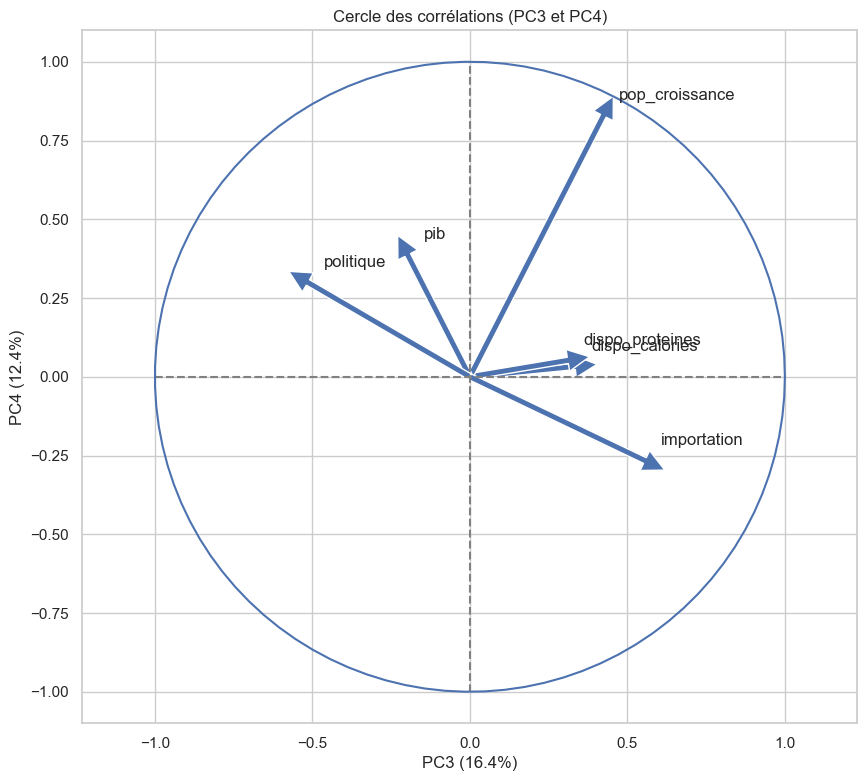

In [38]:
correlation_graph(pca, (2,3), features)

In [39]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-3.33192966, -0.14003009,  1.52070072,  0.06477439,  1.17143003,
        -0.03214613],
       [ 1.53285102,  0.88904729,  2.40972261, -0.92044206, -0.84819172,
         0.14971766],
       [-0.00900179, -0.14982314, -0.86188685, -1.00872386, -0.04718998,
        -0.21272847],
       [-1.71706839, -0.02857101, -0.14791701, -0.04297877,  0.3494128 ,
        -0.06783245],
       [ 1.33781756,  3.58125393,  0.41487322, -0.79532327, -0.42272824,
        -0.0408879 ]])

In [40]:
# Création d'un DataFrame à l'aide des composantes principales
# Ajout du nom du pay ainsi que le groupe et le cluster associé par les methodes précédente (Dendrogramme & K-Means)

df_acp = pd.DataFrame(X_proj)
df_acp.columns = pcs.index
df_acp['pays'] = data.index
#test.set_index('pays', inplace=True)
df_acp_cluster = pd.merge(df_acp, df_pays_cluster, on='pays')
df_acp_cluster = pd.merge(df_acp_cluster, df_pays_groupe, on='pays')
df_acp_cluster

,PC1,PC2,PC3,PC4,PC5,PC6,pays,cluster,Groupe
0,-3.331930,-0.140030,1.520701,0.064774,1.171430,-0.032146,Afghanistan,e,1
1,1.532851,0.889047,2.409723,-0.920442,-0.848192,0.149718,Afrique du Sud,a,2
2,-0.009002,-0.149823,-0.861887,-1.008724,-0.047190,-0.212728,Albanie,b,5
3,-1.717068,-0.028571,-0.147917,-0.042979,0.349413,-0.067832,Algérie,e,1
4,1.337818,3.581254,0.414873,-0.795323,-0.422728,-0.040888,Allemagne,a,2
...,...,...,...,...,...,...,...,...,...
164,-1.351197,-0.278546,0.506252,-0.017627,0.613985,0.035137,Égypte,e,1
165,2.514860,3.141950,1.237893,-0.080981,-0.026539,-0.037968,Émirats arabes unis,a,2
166,3.239010,-0.449090,0.767793,0.551858,1.488956,-0.193261,États-Unis d'Amérique,d,3
167,-2.836052,-0.148853,0.545449,0.064001,0.601297,-0.038207,Éthiopie,e,1


In [41]:
# Création du DataFrame de centroides des groupes crée par le dendrogramme

df_centroide_groupe = df_acp_cluster.groupby('Groupe').mean()
df_centroide_groupe['pays'] = "centroide"
df_centroide_groupe['Groupe'] = "centroide"
df_centroide_groupe

,PC1,PC2,PC3,PC4,PC5,PC6,pays,Groupe
Groupe,,,,,,,,
1,-1.715944,-0.079220,-0.093326,0.119484,-0.125505,-0.009310,centroide,centroide
2,1.890728,2.806762,1.728516,-0.774824,-0.476712,-0.005998,centroide,centroide
3,2.120664,-1.289011,0.331827,0.083878,-0.174103,-0.072607,centroide,centroide
4,1.134772,0.891071,-0.618760,1.417609,0.443541,0.021224,centroide,centroide
5,0.296472,-0.027976,-0.145205,-0.557946,0.177250,0.043690,centroide,centroide


In [42]:
# Création du DataFrame de centroides des groupes crée par K-Means

df_centroide_cluster = df_acp_cluster.groupby('cluster').mean()
df_centroide_cluster['pays'] = "centroide"
df_centroide_cluster['cluster'] = "centroide"
df_centroide_cluster = df_centroide_cluster.drop('Groupe', axis = 1)
df_centroide_cluster

,PC1,PC2,PC3,PC4,PC5,PC6,pays,cluster
cluster,,,,,,,,
a,1.890728,2.806762,1.728516,-0.774824,-0.476712,-0.005998,centroide,centroide
b,-0.221857,-0.255188,-0.093356,-0.637859,0.117906,0.013017,centroide,centroide
c,1.144828,0.653338,-1.133955,0.181317,0.327666,0.045849,centroide,centroide
d,2.003883,-1.098780,0.481838,0.335178,-0.084962,-0.054224,centroide,centroide
e,-1.890459,-0.002559,0.138796,0.283181,-0.137977,-0.002682,centroide,centroide


In [43]:
# Ajout des centroides de groupe dans le DataFrame des composantes principales

df_cah_groupe = df_acp_cluster.drop('cluster', axis=1)
df_cah_groupe = pd.concat([df_cah_groupe, df_centroide_groupe])
df_cah_groupe

,PC1,PC2,PC3,PC4,PC5,PC6,pays,Groupe
0,-3.331930,-0.140030,1.520701,0.064774,1.171430,-0.032146,Afghanistan,1
1,1.532851,0.889047,2.409723,-0.920442,-0.848192,0.149718,Afrique du Sud,2
2,-0.009002,-0.149823,-0.861887,-1.008724,-0.047190,-0.212728,Albanie,5
3,-1.717068,-0.028571,-0.147917,-0.042979,0.349413,-0.067832,Algérie,1
4,1.337818,3.581254,0.414873,-0.795323,-0.422728,-0.040888,Allemagne,2
...,...,...,...,...,...,...,...,...
1,-1.715944,-0.079220,-0.093326,0.119484,-0.125505,-0.009310,centroide,centroide
2,1.890728,2.806762,1.728516,-0.774824,-0.476712,-0.005998,centroide,centroide
3,2.120664,-1.289011,0.331827,0.083878,-0.174103,-0.072607,centroide,centroide
4,1.134772,0.891071,-0.618760,1.417609,0.443541,0.021224,centroide,centroide


In [44]:
# Ajout des centroides de cluster dans le DataFrame des composantes principales

df_km_cluster = df_acp_cluster.drop('Groupe', axis=1)
df_km_cluster = pd.concat([df_km_cluster, df_centroide_cluster])
df_km_cluster

,PC1,PC2,PC3,PC4,PC5,PC6,pays,cluster
0,-3.331930,-0.140030,1.520701,0.064774,1.171430,-0.032146,Afghanistan,e
1,1.532851,0.889047,2.409723,-0.920442,-0.848192,0.149718,Afrique du Sud,a
2,-0.009002,-0.149823,-0.861887,-1.008724,-0.047190,-0.212728,Albanie,b
3,-1.717068,-0.028571,-0.147917,-0.042979,0.349413,-0.067832,Algérie,e
4,1.337818,3.581254,0.414873,-0.795323,-0.422728,-0.040888,Allemagne,a
...,...,...,...,...,...,...,...,...
a,1.890728,2.806762,1.728516,-0.774824,-0.476712,-0.005998,centroide,centroide
b,-0.221857,-0.255188,-0.093356,-0.637859,0.117906,0.013017,centroide,centroide
c,1.144828,0.653338,-1.133955,0.181317,0.327666,0.045849,centroide,centroide
d,2.003883,-1.098780,0.481838,0.335178,-0.084962,-0.054224,centroide,centroide


In [45]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette = 'Paired')
    
    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'PC{x+1} {v1}')
    ax.set_ylabel(f'PC{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur PC{x+1} et PC{y+1})")
    plt.show()

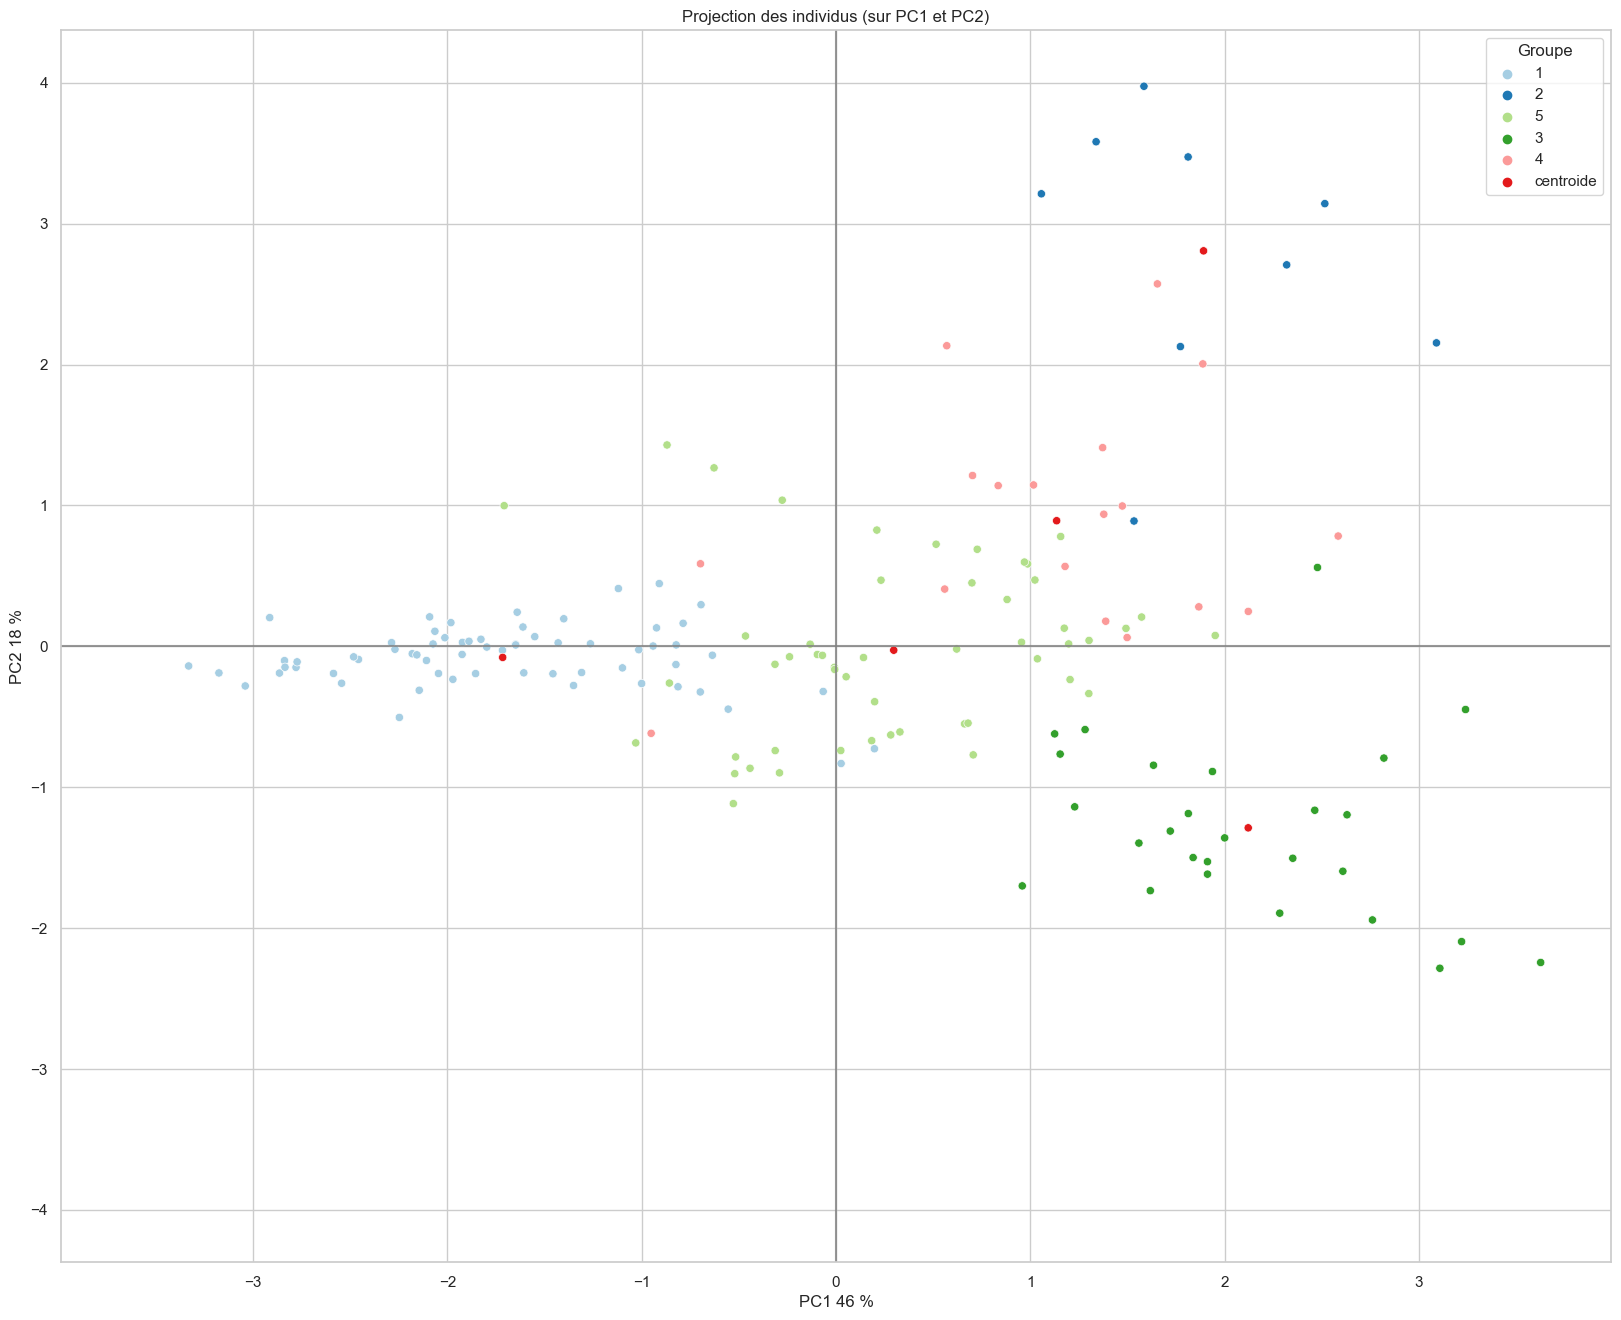

In [46]:
# Affichage du clustering crée par le dendrogramme

x_y = [0,1]
display_factorial_planes(df_cah_groupe, x_y, pca, figsize=(20,16), clusters=df_cah_groupe.Groupe, marker="o")
#, labels = data.index

**Certains points du groupe 4 sont très éloigner de leurs centroides !**

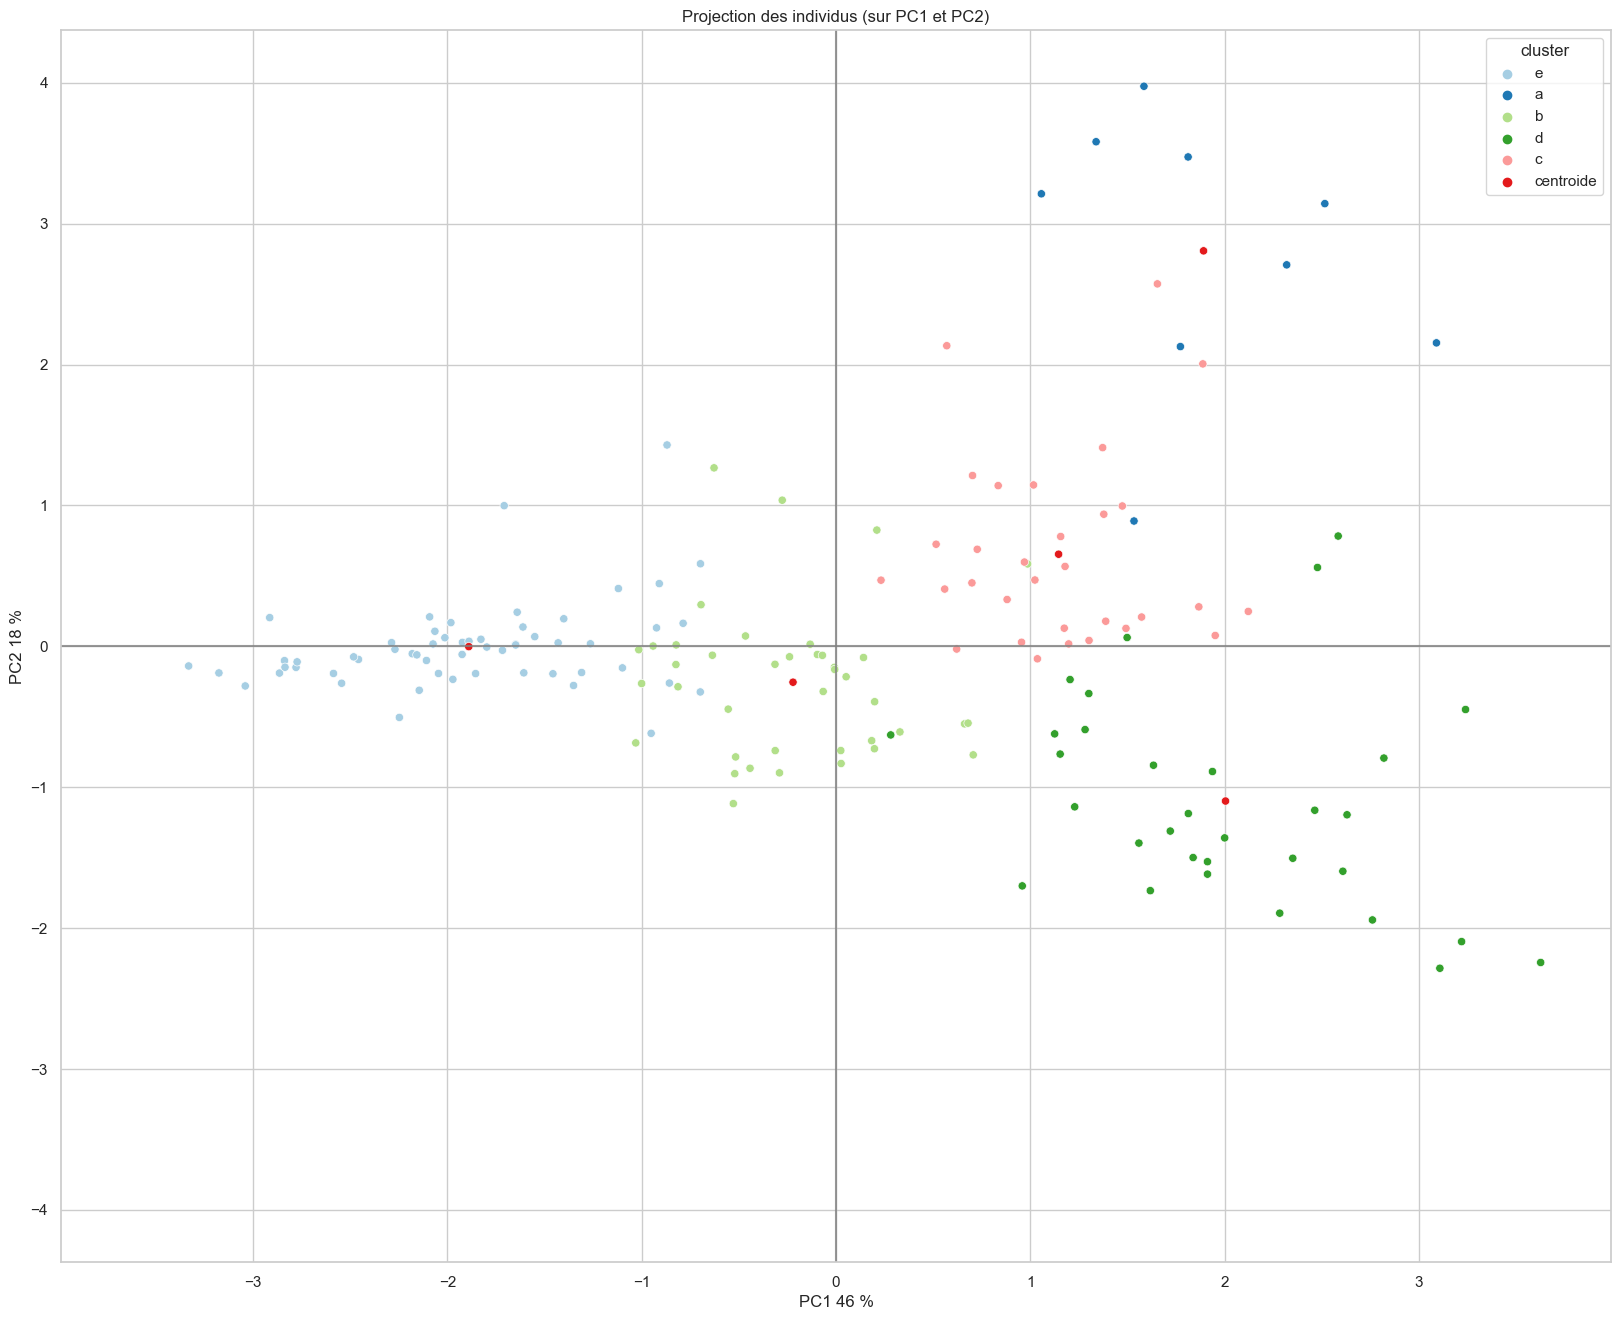

In [47]:
# Affichage du clustering crée par K-Means

x_y = [0,1]
display_factorial_planes(df_km_cluster, x_y, pca, figsize=(20,16), clusters=df_km_cluster.cluster, marker="o")

**Les différents cluster sont assez bien regrouper autour de leurs centroides !**

Comme vu précédement les groupes créer par les 2 méthodes de clustering sont différents mais assez semblable.
Cependant la méthode K-Means regroupe mieux les individus dans une zone !

**Le groupe des 9 pays est le même pour les 2 méthode de clustering !**

C:\Users\Ibrahim\AppData\Local\Temp\ipykernel_8396\2628693278.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')  # Affichage en 3D


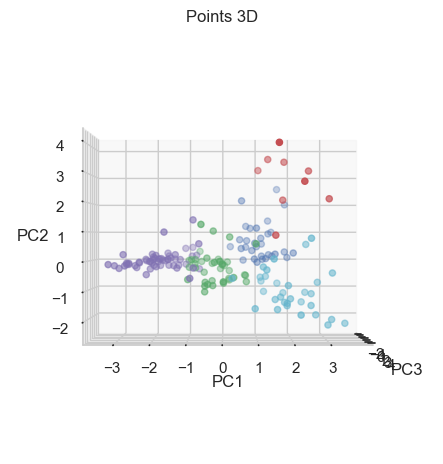

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  # Fonction pour la 3D
import numpy as np

oui = df_km_cluster['cluster'][df_km_cluster['cluster'] != "centroide"]

# Tracé du résultat en 3D
fig = plt.figure()
ax = fig.gca(projection='3d')  # Affichage en 3D
ax.scatter(X_proj[:,2], X_proj[:,0], X_proj[:,1], c=oui.map({'a':'r','b':'g','c':'b','d':'c','e':'m'}))  # Tracé des points 3D
plt.title("Points 3D")
ax.set_xlabel('PC3')
ax.set_ylabel('PC1')
ax.set_zlabel('PC2')
ax.view_init(0, 0) # Vue de face
#ax.view_init(0, 90) # Vue en profondeur
plt.tight_layout()
plt.show()

In [50]:
# Flèches 3D

import numpy as np
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):

    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxdydz = (dx, dy, dz)

    def draw(self, renderer):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)
        
    def do_3d_projection(self, renderer=None):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))

        return np.min(zs)

def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)


#setattr(Axes3D, 'arrow3D', _arrow3D)

In [52]:
# Annotation 3D

from matplotlib.text import Annotation

class Annotation3D(Annotation):

    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0, 0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, self.axes.M)
        self.xy = (x2, y2)
        super().draw(renderer)

def _annotate3D(ax, text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation = Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

#setattr(Axes3D, 'annotate3D', _annotate3D)

C:\Users\Ibrahim\AppData\Local\Temp\ipykernel_8396\1217951081.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')  # Affichage en 3D


AttributeError: 'Axes3DSubplot' object has no attribute 'arrow3D'

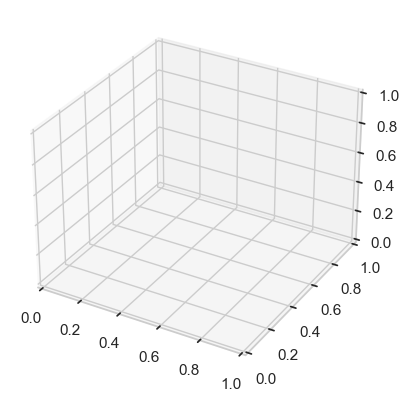

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  # Fonction pour la 3D
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.patches import FancyArrowPatch
import numpy as np

# Tracé du résultat en 3D
fig = plt.figure()
ax = fig.gca(projection='3d')  # Affichage en 3D
#ax.scatter(pcs.T['PC1'], pcs.T['PC2'], pcs.T['PC3'], label= pcs.T.index, cmap="viridis" )  # Tracé des points 3D
# Pour chaque composante : 
for i in range(0, pca.components_.shape[1]):
    ax.arrow3D(0,0,0,pca.components_[2, i],pca.components_[0, i],pca.components_[1, i],mutation_scale=20,arrowstyle="-|>",linestyle='dashed')
    ax.annotate3D(features[i],(pca.components_[2, i],pca.components_[0, i],pca.components_[1, i]), xytext=(-30,-30), textcoords='offset points')
    # Les labels
    #plt.text(pca.components_[2, i] + 0.05,pca.components_[0, i] + 0.05,pca.components_[1, i] + 0.05,features[i],)
plt.title("Points 3D")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.tight_layout()
plt.show()

IndexError: index 169 is out of bounds for axis 0 with size 169

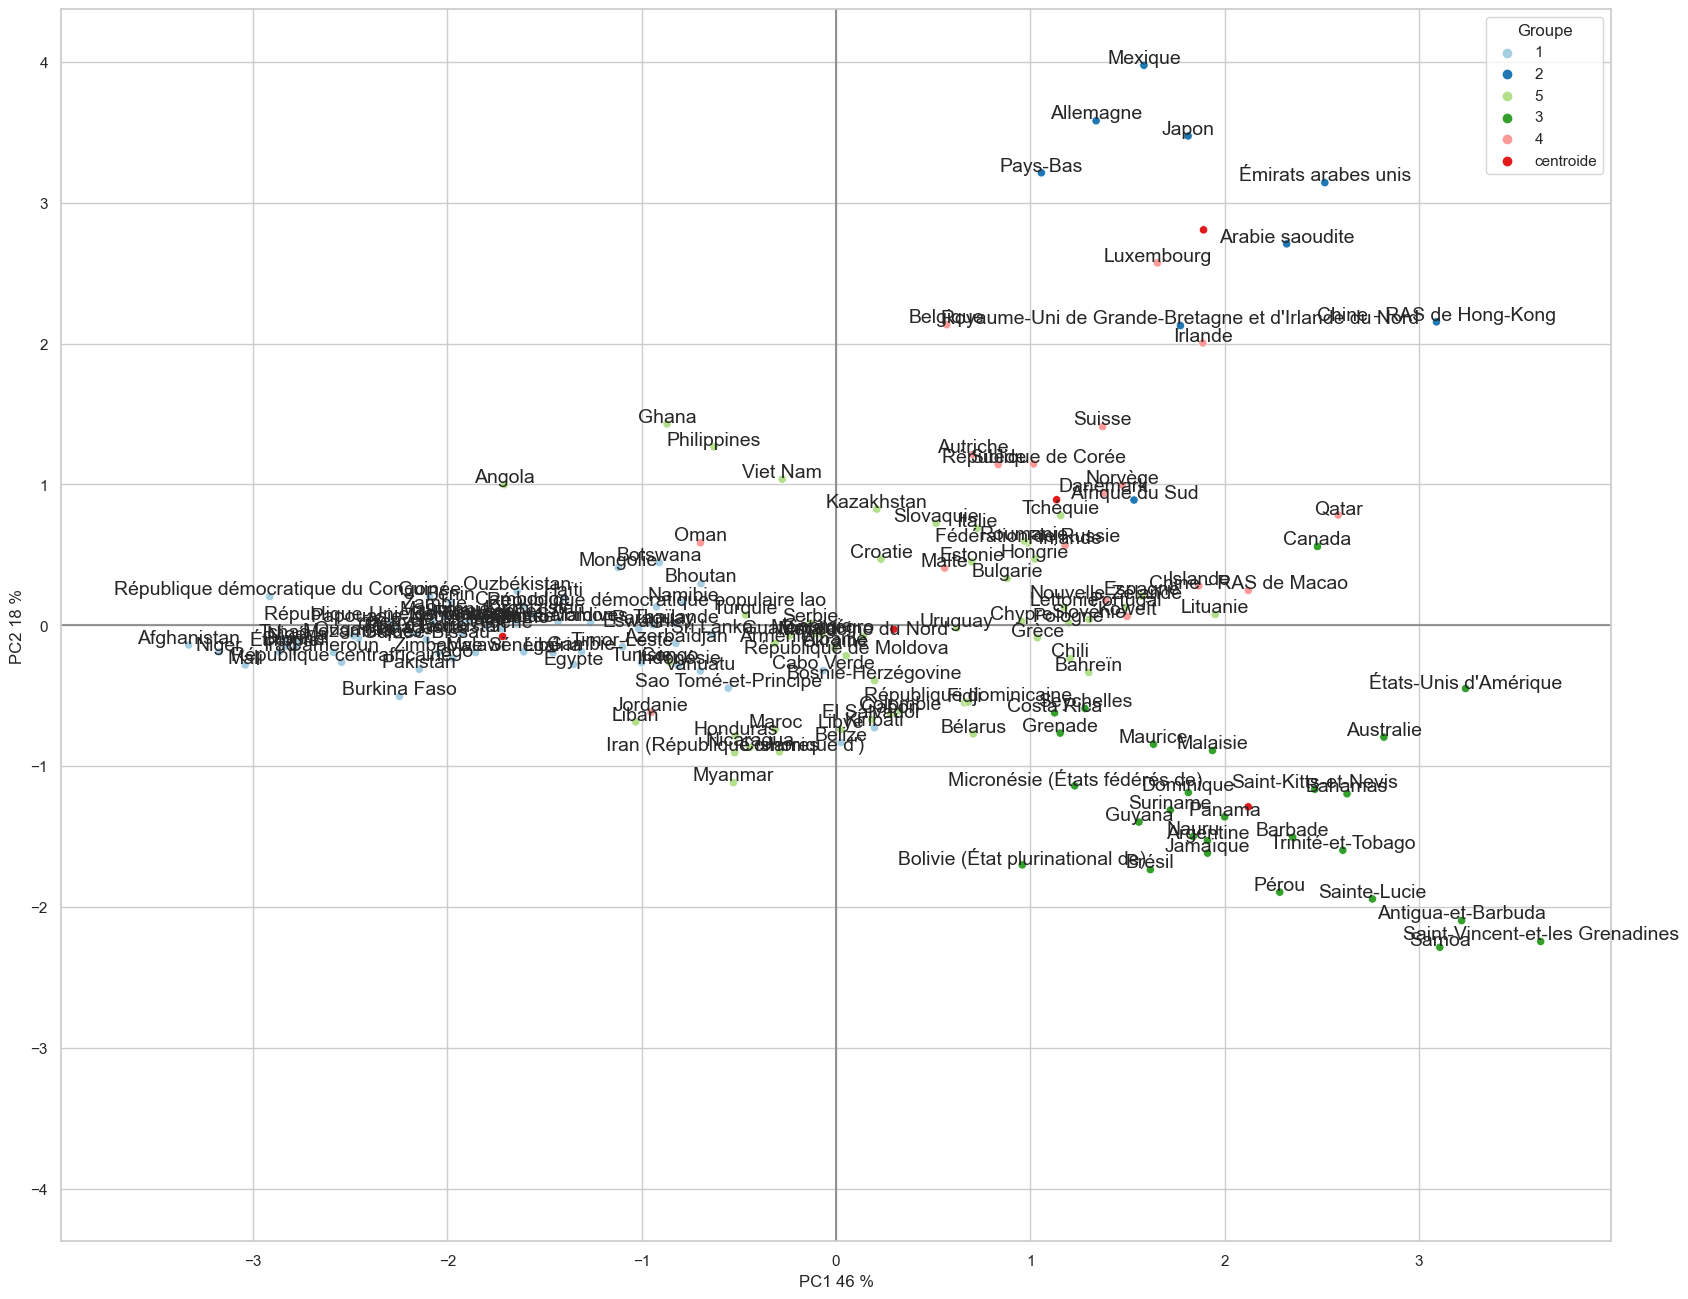

In [54]:
# Affichage du clustering crée par le dendrogramme + labels

x_y = [0,1]
display_factorial_planes(df_cah_groupe, x_y, pca, figsize=(20,16), clusters=df_cah_groupe.Groupe, marker="o", labels = data.index)


In [55]:
pcs.importation

PC1    0.169005
PC2    0.701649
PC3    0.555674
PC4   -0.266054
PC5   -0.315462
PC6   -0.007103
Name: importation, dtype: float64

In [56]:
pca.components_[0, 5]

0.16900544604599377

In [57]:
features[1]

'dispo_proteines'

IndexError: index 169 is out of bounds for axis 0 with size 169

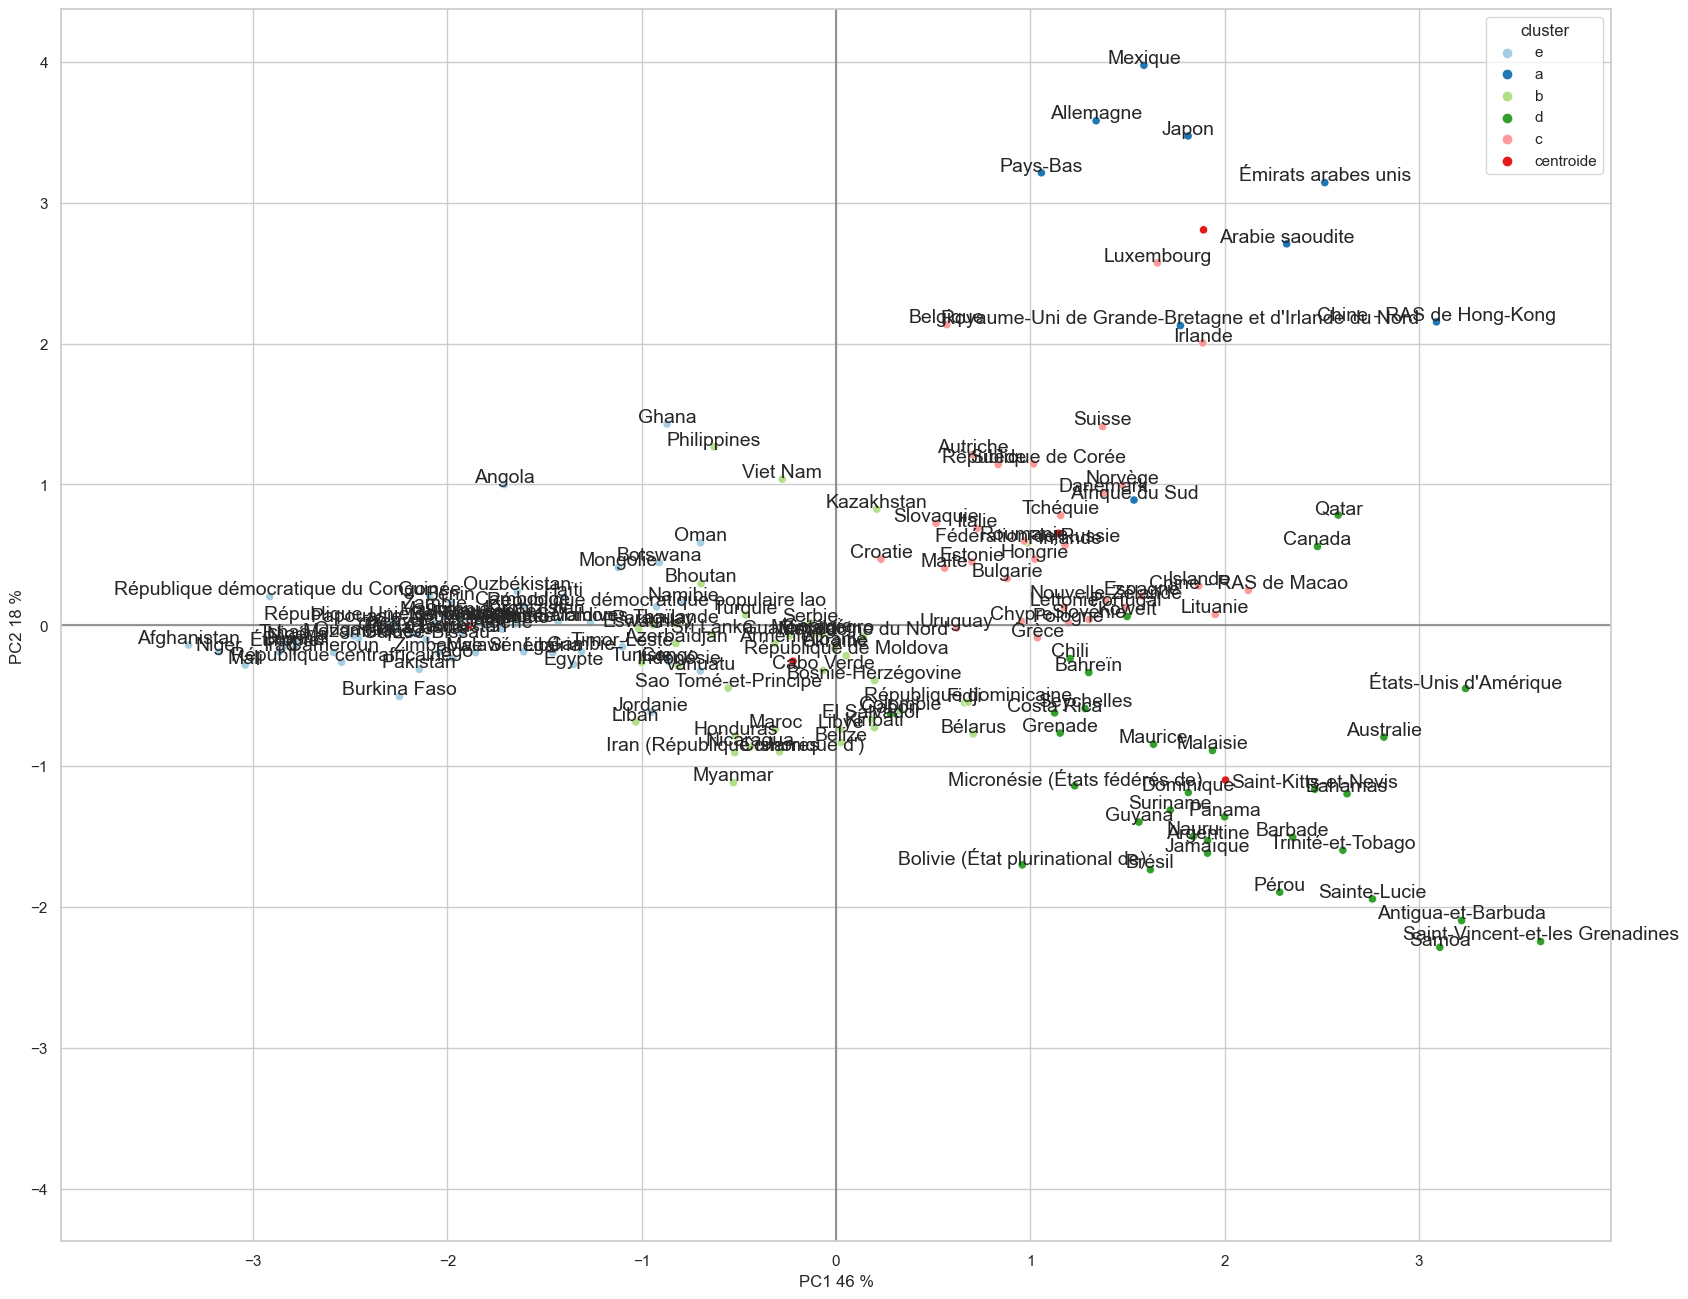

In [58]:
# Affichage du clustering crée par K-Means

x_y = [0,1]
display_factorial_planes(df_km_cluster, x_y, pca, figsize=(20,16), clusters=df_km_cluster.cluster, marker="o", labels = data.index)